In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/task-5/working/train_data.npz
/kaggle/input/task-5/working/test_data.npz
/kaggle/input/task-5/working/C_model.keras


In [2]:
!pip install pennylane

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 32.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 60.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 39.9 MB/s eta 0:00:00:00:01


In [3]:
!pip install keras==2.10 tensorflow==2.10 ;

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 30.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 2.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 64.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 66.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 30.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorfl

In [4]:
import pennylane as qml
from pennylane import numpy as np

In [5]:
import tensorflow as tf;
from tensorflow.keras import layers, models;
import json
import os
from PIL import Image
import random
import numpy as np
import matplotlib.pyplot as plt;

2024-08-09 22:29:59.899110: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl7strings6StrCatB5cxx11ERKNS0_8AlphaNumES3_']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libt

In [6]:

# Load the data
loaded_test_data = np.load('/kaggle/input/task-5/working/test_data.npz')
X_test = loaded_test_data['X_test']
y_test = loaded_test_data['y_test']
p_test = loaded_test_data['prediction_test']

loaded_train_data = np.load('/kaggle/input/task-5/working/train_data.npz')
X_train = loaded_train_data['X_train']
y_train = loaded_train_data['y_train']
p_train = loaded_train_data['prediction_train']

# Verify the loaded data
print("Test data shapes:", X_test.shape, y_test.shape, p_test.shape)
print("Train data shapes:", X_train.shape, y_train.shape, p_train.shape)



Test data shapes: (2358, 256, 256, 1) (2358, 6) (2358, 6)
Train data shapes: (9430, 256, 256, 1) (9430, 6) (9430, 6)


In [7]:
def binary_classify(y):
  y_bin = []
  for j in y:
    if j[0] == 1:
      y_bin.append([1,0]) #good weld
    else:
      y_bin.append([0,1]) #defective
  return tf.convert_to_tensor(y_bin)

In [8]:
p_train  = tf.convert_to_tensor(p_train)
p_test = tf.convert_to_tensor(p_test)

In [9]:
p_train.shape,p_test.shape

(TensorShape([9430, 6]), TensorShape([2358, 6]))

In [10]:
y_train_bin = binary_classify(y_train)
y_test_bin =  binary_classify(y_test)

In [11]:
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

In [12]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(TensorShape([9430, 256, 256, 1]),
 TensorShape([9430, 6]),
 TensorShape([2358, 256, 256, 1]),
 TensorShape([2358, 6]))

In [13]:
y_train_bin.shape , y_test_bin.shape

(TensorShape([9430, 2]), TensorShape([2358, 2]))

In [14]:

n_qubits = 6
n_layers = 6 # higher number of layer are harder to simulate but gives higher accuracy
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def qnode(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits))
    qml.BasicEntanglerLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]


weight_shapes = {"weights": (n_layers, n_qubits)}

In [15]:
tf.get_logger().setLevel('ERROR')

In [16]:
qlayer = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits)
# Create a new model with the QuantumLayer on top
input_layer = tf.keras.layers.Input(shape=(6,))
# Apply the Quantum Layer Parallel
x = qlayer(input_layer)
output_layer = layers.Dense(2, activation='softmax')(x)
q_model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

q_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the new model
q_history = q_model.fit(p_train, y_train_bin, epochs=7, validation_data=(p_test, y_test_bin))


Epoch 1/7
295/295 [==============================] - 62s 208ms/step - loss: 0.3353 - accuracy: 0.9614 - val_loss: 0.0778 - val_accuracy: 1.0000
Epoch 2/7
295/295 [==============================] - 62s 211ms/step - loss: 0.0330 - accuracy: 0.9999 - val_loss: 0.0127 - val_accuracy: 1.0000
Epoch 3/7
295/295 [==============================] - 62s 210ms/step - loss: 0.0084 - accuracy: 0.9999 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 4/7
295/295 [==============================] - 63s 214ms/step - loss: 0.0040 - accuracy: 0.9999 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 5/7
295/295 [==============================] - 63s 214ms/step - loss: 0.0025 - accuracy: 0.9999 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 6/7
295/295 [==============================] - 62s 211ms/step - loss: 0.0018 - accuracy: 0.9999 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 7/7
295/295 [==============================] - 62s 210ms/step - loss: 0.0015 - accuracy: 0.9999 - val_loss: 7.2275e-04 - val_accur

In [17]:

predictions_Q = q_model.predict(p_test)

74/74 [==============================] - 7s 93ms/step


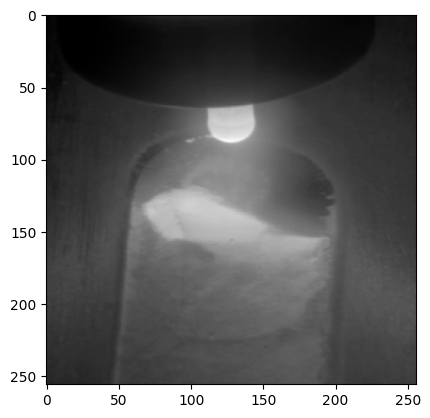

Prediction : Good Weld
Original : Good Weld


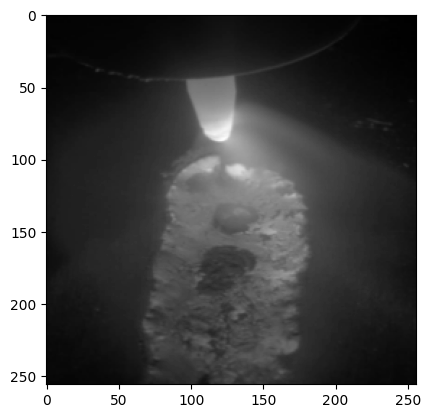

Prediction : Defective
Original : Defective


In [25]:
for _ in range(2):
    rand_img = np.random.randint(low = 0, high = len(X_test))
    plt.imshow(X_test[rand_img].numpy(), cmap='gray')
    plt.show()
    print(f"Prediction : {'Good Weld' if np.argmax(predictions_Q[rand_img])==0 else 'Defective'}")
    print(f"Original : {'Good Weld' if np.argmax(y_test_bin[rand_img])==0 else 'Defective'}")

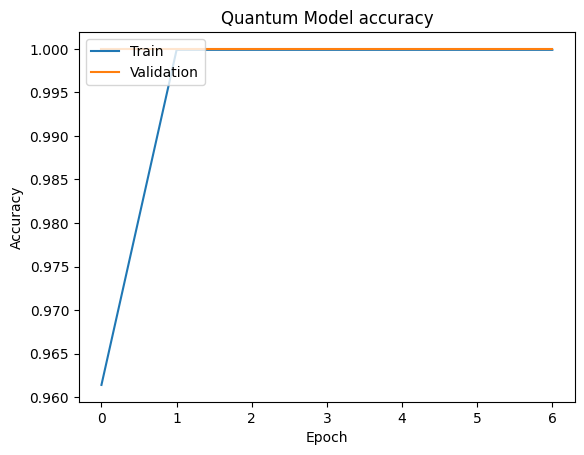

In [19]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(q_history.history['accuracy'])
plt.plot(q_history.history['val_accuracy'])
plt.title('Quantum Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [31]:
# Create a new classical model for comparision
i = tf.keras.layers.Input(shape=(6,))
o = layers.Dense(2, activation='softmax')(i)

c_model = tf.keras.models.Model(inputs=i, outputs=o)

c_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the new model
c_history = c_model.fit(p_train, y_train_bin, epochs=7, validation_data=(p_test, y_test_bin))

Epoch 1/7
295/295 [==============================] - 1s 3ms/step - loss: 0.6825 - accuracy: 0.5839 - val_loss: 0.5281 - val_accuracy: 0.6586
Epoch 2/7
295/295 [==============================] - 1s 2ms/step - loss: 0.4266 - accuracy: 0.7821 - val_loss: 0.3542 - val_accuracy: 0.8232
Epoch 3/7
295/295 [==============================] - 1s 2ms/step - loss: 0.2955 - accuracy: 0.8320 - val_loss: 0.2546 - val_accuracy: 0.8232
Epoch 4/7
295/295 [==============================] - 1s 2ms/step - loss: 0.2157 - accuracy: 0.9807 - val_loss: 0.1892 - val_accuracy: 1.0000
Epoch 5/7
295/295 [==============================] - 1s 2ms/step - loss: 0.1621 - accuracy: 0.9999 - val_loss: 0.1439 - val_accuracy: 1.0000
Epoch 6/7
295/295 [==============================] - 1s 2ms/step - loss: 0.1245 - accuracy: 0.9999 - val_loss: 0.1116 - val_accuracy: 1.0000
Epoch 7/7
295/295 [==============================] - 1s 2ms/step - loss: 0.0973 - accuracy: 0.9999 - val_loss: 0.0879 - val_accuracy: 1.0000


In [32]:

predictions_c = c_model.predict(p_test)

74/74 [==============================] - 0s 1ms/step


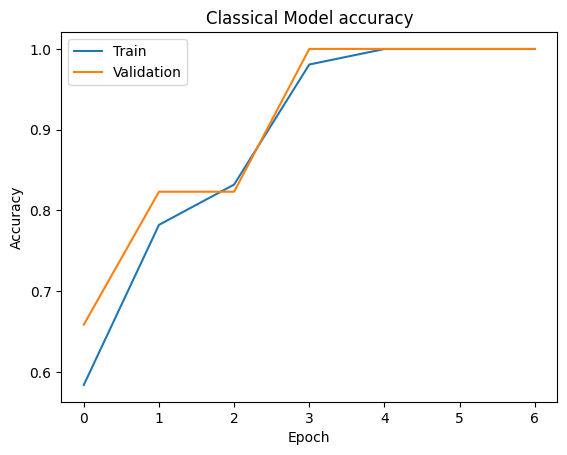

In [33]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(c_history.history['accuracy'])
plt.plot(c_history.history['val_accuracy'])
plt.title('Classical Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()